In [2]:
import pandas as pd
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import src.airpo_resources as sr

In [3]:
#!kaggle datasets download -d threnjen/40-years-of-air-quality-index-from-the-epa-yearly

In [4]:
#!unzip 40-years-of-air-quality-index-from-the-epa-yearly

In [5]:
df = pd.read_csv("aqi_yearly_1980_to_2021.csv")
pd.set_option('display.max_columns', None)

In [6]:
df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
0,Alabama,DeKalb,2021,58,58,0,0,0,0,0,49,42,32,0,0,58,0,0,0,34.289001,-85.970065
1,Alabama,Jefferson,2021,60,33,27,0,0,0,0,93,64,50,1,1,2,0,55,1,33.565278,-86.796389
2,Alaska,Denali,2021,59,59,0,0,0,0,0,43,41,39,0,0,59,0,0,0,63.723200,-148.967600
3,Arizona,Apache,2021,87,87,0,0,0,0,0,25,19,11,0,0,0,0,1,86,34.058475,-109.441259
4,Arizona,Cochise,2021,90,77,12,1,0,0,0,104,54,41,0,0,48,0,0,42,32.009410,-109.389060


In [7]:
df2 = df.drop(['Days with AQI', 'Good Days','Moderate Days', 'Unhealthy for Sensitive Groups Days','Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days'],axis = 1)

In [8]:
df2.head()

,State,County,Year,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
0,Alabama,DeKalb,2021,49,42,32,0,0,58,0,0,0,34.289001,-85.970065
1,Alabama,Jefferson,2021,93,64,50,1,1,2,0,55,1,33.565278,-86.796389
2,Alaska,Denali,2021,43,41,39,0,0,59,0,0,0,63.723200,-148.967600
3,Arizona,Apache,2021,25,19,11,0,0,0,0,1,86,34.058475,-109.441259
4,Arizona,Cochise,2021,104,54,41,0,0,48,0,0,42,32.009410,-109.389060


In [9]:
df3 = pd.DataFrame(df.groupby(['State','Year'])['Median AQI'].mean())

In [10]:
df3.head()

Median AQI
State   Year            
Alabama 1980   45.000000
        1981   50.833333
        1982   44.833333
        1983   43.000000
        1984   38.250000

In [11]:
df4 = pd.DataFrame(df3.groupby(['Year'])['Median AQI'].mean())

In [12]:
pop_year = sr.get_info()

In [13]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

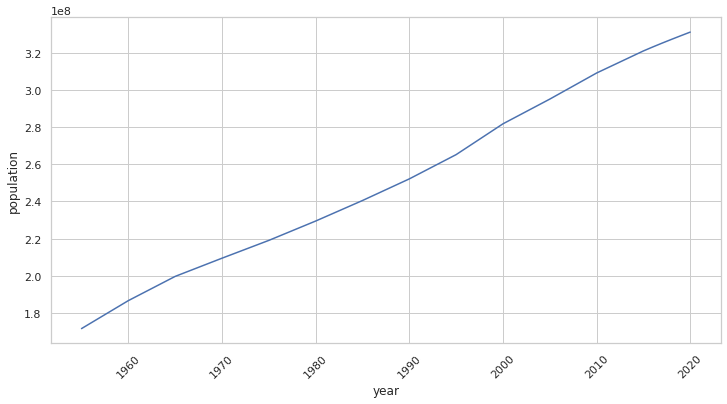

In [14]:
fig = sns.lineplot(x = pop_year.year, y = pop_year.population)
plt.xticks(rotation=45)
fig.figure.savefig("img/gráfico1.jpg", dpi=1000)

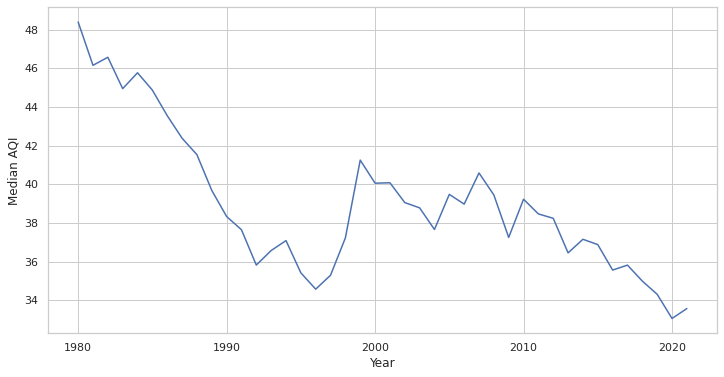

In [15]:
fig = sns.lineplot(x = df4.index, y = df4['Median AQI'])
fig.figure.savefig("img/gráfico2.jpg", dpi=1000)

In [16]:
columnas = ['Good Days','Moderate Days', 'Unhealthy for Sensitive Groups Days','Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days']
dias = pd.DataFrame(df[columnas].sum())
dias_trans = dias.transpose()

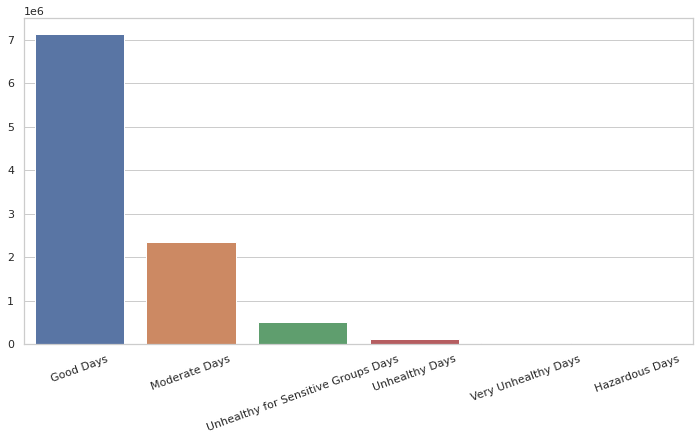

In [23]:
fig = sns.barplot(x = columnas, y = list(dias_trans.iloc[0]))
plt.xticks(rotation=20)
fig.figure.savefig("img/gráfico3.jpg")

In [18]:
df6 = df3.reset_index()
df5 = df6[df6['Year'] == 2020]

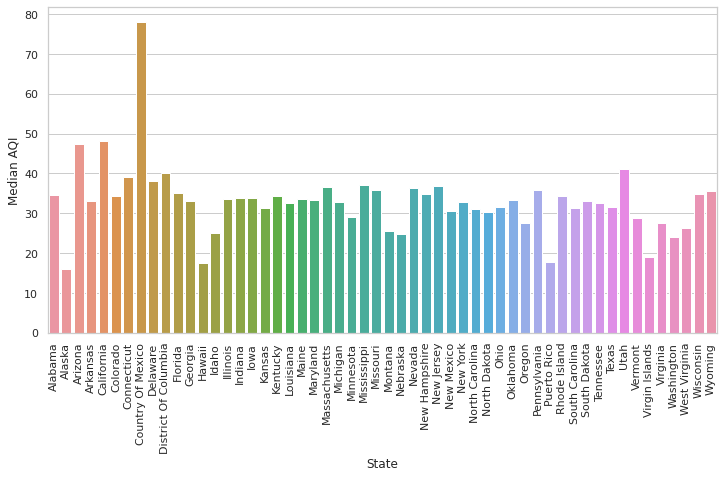

In [19]:
fig = sns.barplot(data = df5, x = df5['State'], y = df5["Median AQI"])
plt.xticks(rotation=90)
fig.figure.savefig("img/gráfico4.jpg", dpi=1000)